# Linear Regression: Predict Canada's Per Capita Income in 2020
This notebook loads the provided CSV, fits a Linear Regression model, makes the 2020 prediction, and plots the results.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re

# Load dataset

In [6]:
csv_path = "/mnt/data/canada_per_capita_income.csv"
df = pd.read_csv('/kaggle/input/canada-pci-data/canada_per_capita_income.csv')

# Normalize column names

In [7]:
def normalize(col):
    import re
    return re.sub(r'[^0-9a-zA-Z]+', '_', col).strip('_').lower()

df = df.rename(columns={c: normalize(c) for c in df.columns})

# Identify columns

In [8]:
year_col_candidates = [c for c in df.columns if "year" in c]
income_col_candidates = [c for c in df.columns if ("income" in c) or ("per_capita" in c) or ("per_capita_income" in c)]

if not year_col_candidates:
    year_col_candidates = ['year'] if 'year' in df.columns else []

if not income_col_candidates:
    for guess in ["per_capita_income_us", "per_capita_income", "income", "per_capita_income_us$"]:
        if guess in df.columns:
            income_col_candidates = [guess]
            break

assert year_col_candidates, f"Couldn't find a year column in: {df.columns.tolist()}"
assert income_col_candidates, f"Couldn't find an income column in: {df.columns.tolist()}"

year_col = year_col_candidates[0]
income_col = income_col_candidates[0]

# Train Linear Regression

In [9]:
X = df[[year_col]].values.astype(float)
y = df[income_col].values.astype(float)
lr = LinearRegression().fit(X, y)

# Predict for 2020

In [10]:
year_to_predict = 2020
pred_2020 = float(lr.predict(np.array([[year_to_predict]]))[0])
print("Predicted per capita income for 2020 (US$):", round(pred_2020, 2))

Predicted per capita income for 2020 (US$): 41288.69


# Plot

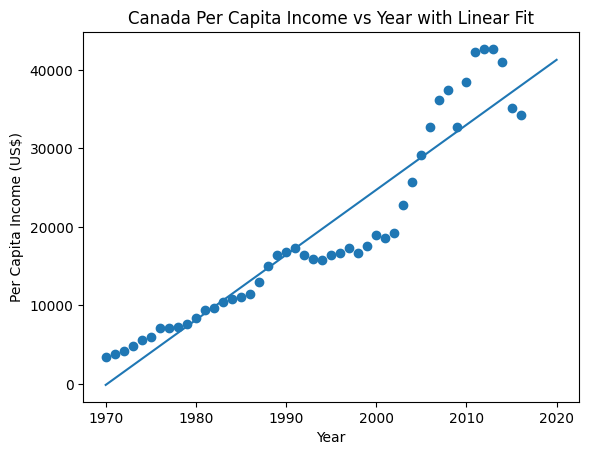

In [11]:
plt.figure()
plt.scatter(X, y)
years_range = np.linspace(X.min(), max(X.max(), year_to_predict), 200).reshape(-1, 1)
plt.plot(years_range, lr.predict(years_range))
plt.title("Canada Per Capita Income vs Year with Linear Fit")
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.show()